In [1]:
from allensdk.brain_observatory.behavior.behavior_data_session import BehaviorDataSession
from visual_behavior.encoder_processing.running_data_smoothing import process_encoder_data
from visual_behavior import database as db
from visual_behavior.translator.foraging2 import data_to_change_detection_core

import pandas as pd
import matplotlib.pyplot as plt

In [10]:
%matplotlib notebook

In [2]:
behavior_session_id = 974807143

## get data directly from PKL file

In [3]:
pkl_path = db.get_pkl_path(session_id=behavior_session_id, id_type='BehaviorSession')
pkl_path

'/allen/programs/braintv/production/visualbehavior/prod3/specimen_925234058/behavior_session_974807143/974659900.pkl'

In [4]:
vb_core_data = data_to_change_detection_core(pd.read_pickle(pkl_path))
vb_core_data['running']

,time,frame,speed,dx,v_sig,v_in
0,0.000000,0,8.084529,0.000000,0.616515,4.990407
1,0.016695,1,13.225402,4.607259,0.682317,5.004600
2,0.033520,2,18.572311,1.405188,0.701670,5.003310
3,0.049977,3,14.590974,3.281192,0.745538,4.991698
4,0.066676,4,11.898704,3.217284,0.791987,5.003310
...,...,...,...,...,...,...
269859,4501.423112,269859,17.030125,2.967353,2.430583,5.002019
269860,4501.439796,269860,17.937057,1.622371,2.451227,4.998149
269861,4501.456435,269861,18.746332,4.089972,2.504127,4.990407
269862,4501.473152,269862,18.741708,4.085536,2.566058,5.000729


## smooth data from PKL file:

In [5]:
smoothed_pkl_running = process_encoder_data(
    vb_core_data['running'].rename(columns={'time':'timestamps'}), 
    v_max='v_sig_max'
).set_index('timestamps')

In [6]:
smoothed_pkl_running

,frame,speed,v_sig,v_in,wrap_ID,v_sig_unwrapped,speed_raw,speed_raw_pre_wrap_correction,acceleration,jerk
timestamps,,,,,,,,,,
0.000000,0,-0.002081,0.616515,4.990407,0,NaN,NaN,NaN,NaN,NaN
0.016695,1,2.925583,0.682317,5.004600,0,0.682317,NaN,NaN,175.363174,NaN
0.033520,2,7.010913,0.701670,5.003310,0,0.701670,NaN,NaN,242.803839,4008.208293
0.049977,3,11.185433,0.745538,4.991698,0,0.745538,18.499329,18.499329,253.671263,660.376064
0.066676,4,13.255703,0.791987,5.003310,0,0.791987,19.303031,19.303031,123.976027,-7766.667054
...,...,...,...,...,...,...,...,...,...,...
4501.423112,269859,15.645778,2.430583,5.002019,0,26933.740124,16.603437,16.603437,20.854709,2445.466445
4501.439796,269860,17.116909,2.451227,4.998149,0,26933.760768,8.587098,8.587098,88.179109,4035.400248
4501.456435,269861,18.936963,2.504127,4.990407,0,26933.813668,22.063250,22.063250,109.384928,1274.466310


## get running data from SDK session object:

In [7]:
session = BehaviorDataSession.from_lims(behavior_session_id)

session.running_data_df

/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py:126: RuntimeWarning: invalid value encountered in greater
  np.logical_and(vsig < min_threshold, shifted_vsig > max_threshold)
/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py:129: RuntimeWarning: invalid value encountered in less
  np.logical_and(vsig > max_threshold, shifted_vsig < min_threshold)
/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py:259: RuntimeWarning: invalid value encountered in less_equal
  np.abs(unwrapped_diff) <= max_diff, unwrapped_diff, np.nan)
/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py:15: RuntimeWarning: Mean of empty slice
  dxdt = np.nanmean(dxdt, axis=0)
/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py:284: RuntimeWarning: invalid value encountered in greater
  exceed = np.array(scores > threshold).nonzero()[0]


,speed,dx,v_sig,v_in
timestamps,,,,
5.806940,-0.001157,0.000000,0.616515,4.990407
5.823635,7.659028,4.607259,0.682317,5.004600
5.840460,13.248093,1.405188,0.701670,5.003310
5.856917,15.280573,3.281192,0.745538,4.991698
5.873616,14.004981,3.217284,0.791987,5.003310
...,...,...,...,...
4507.230052,16.151283,2.967353,2.430583,5.002019
4507.246736,18.162240,1.622371,2.451227,4.998149
4507.263375,19.983782,4.089972,2.504127,4.990407


## replace timestamps in VBA implementation with timestamps from SDK (since VBA timestamps don't come from sync)

In [8]:
smoothed_pkl_running.index = session.stimulus_timestamps
smoothed_pkl_running.index.name = 'timestamps'

## plot

<IPython.core.display.Javascript object>


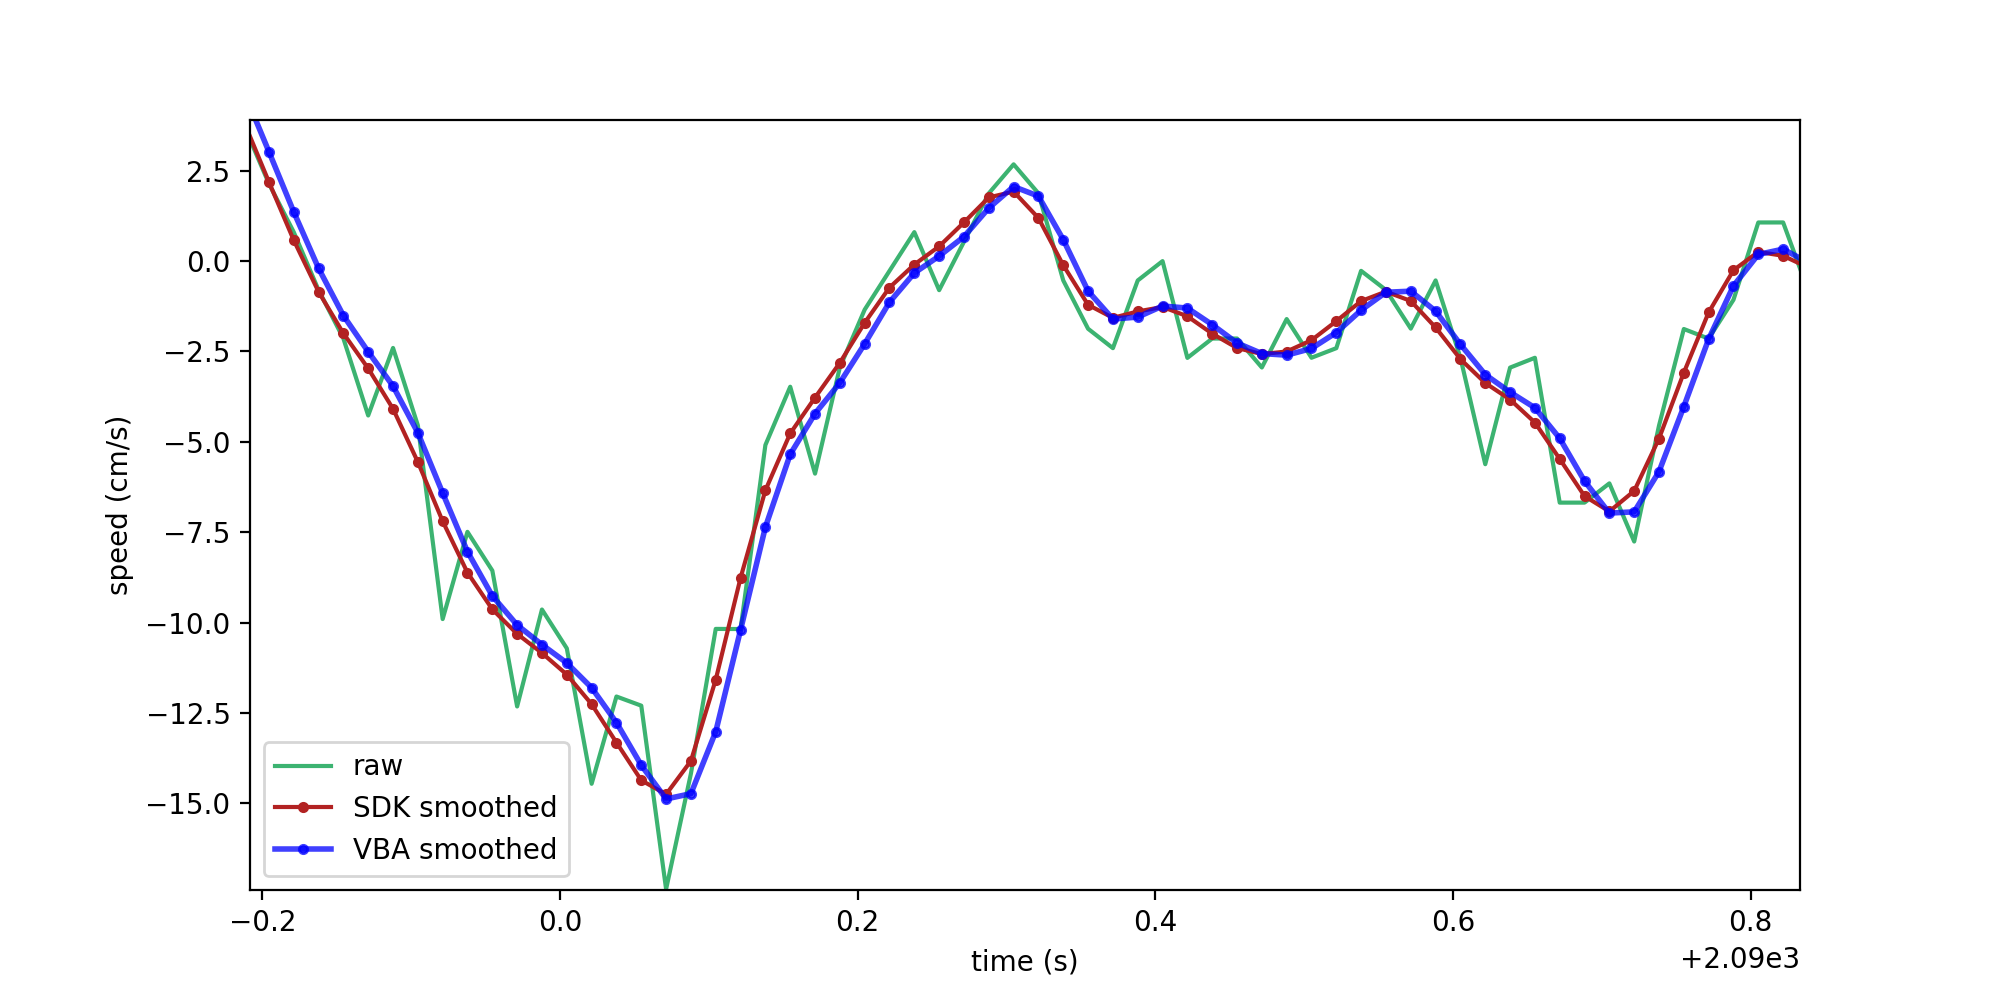

Text(0, 0.5, 'speed (cm/s)')

In [20]:
fig,ax=plt.subplots(figsize=(10,5))
t0=2000
t1=2100



ax.plot(
    session.raw_running_data_df.reset_index().query('timestamps > @t0 and timestamps <@t1')['timestamps'],
    session.raw_running_data_df.reset_index().query('timestamps > @t0 and timestamps <@t1')['speed'],
    color='mediumseagreen'
)

ax.plot(
    session.running_data_df.reset_index().query('timestamps > @t0 and timestamps <@t1')['timestamps'],
    session.running_data_df.reset_index().query('timestamps > @t0 and timestamps <@t1')['speed'],
    color='firebrick',
    marker='.'
)

ax.plot(
    smoothed_pkl_running.reset_index().query('timestamps > @t0 and timestamps <@t1')['timestamps'],
    smoothed_pkl_running.reset_index().query('timestamps > @t0 and timestamps <@t1')['speed'],
    color='blue',
    linewidth=2,
    alpha=0.75,
    marker='.'
)
ax.legend(['raw','SDK smoothed','VBA smoothed'])
ax.set_xlabel('time (s)')
ax.set_ylabel('speed (cm/s)')

In [18]:
smoothed_pkl_running

,frame,speed,v_sig,v_in,wrap_ID,v_sig_unwrapped,speed_raw,speed_raw_pre_wrap_correction,acceleration,jerk
timestamps,,,,,,,,,,
5.806940,0,-0.002081,0.616515,4.990407,0,NaN,NaN,NaN,NaN,NaN
5.823635,1,2.925583,0.682317,5.004600,0,0.682317,NaN,NaN,175.363174,NaN
5.840460,2,7.010913,0.701670,5.003310,0,0.701670,NaN,NaN,242.803839,4008.208293
5.856917,3,11.185433,0.745538,4.991698,0,0.745538,18.499329,18.499329,253.671263,660.376064
5.873616,4,13.255703,0.791987,5.003310,0,0.791987,19.303031,19.303031,123.976027,-7766.667054
...,...,...,...,...,...,...,...,...,...,...
4507.230052,269859,15.645778,2.430583,5.002019,0,26933.740124,16.603437,16.603437,20.854709,2445.466445
4507.246736,269860,17.116909,2.451227,4.998149,0,26933.760768,8.587098,8.587098,88.179109,4035.400248
4507.263375,269861,18.936963,2.504127,4.990407,0,26933.813668,22.063250,22.063250,109.384928,1274.466310


In [19]:
session.running_data_df

,speed,dx,v_sig,v_in
timestamps,,,,
5.806940,-0.001157,0.000000,0.616515,4.990407
5.823635,7.659028,4.607259,0.682317,5.004600
5.840460,13.248093,1.405188,0.701670,5.003310
5.856917,15.280573,3.281192,0.745538,4.991698
5.873616,14.004981,3.217284,0.791987,5.003310
...,...,...,...,...
4507.230052,16.151283,2.967353,2.430583,5.002019
4507.246736,18.162240,1.622371,2.451227,4.998149
4507.263375,19.983782,4.089972,2.504127,4.990407
